# Answer to Question 1 :
Reading the csv file using pandas and storing it in a dataframe

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv("solder.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [11]:
# Checking the shape of the data (dimensions)
data.shape

# 900 rows and 6 columns

(900, 6)

In [12]:
data.head()

,Opening,Solder,Mask,PadType,Panel,skips
1,L,Thick,A1.5,W4,1,0
2,L,Thick,A1.5,W4,2,0
3,L,Thick,A1.5,W4,3,0
4,L,Thick,A1.5,D4,1,0
5,L,Thick,A1.5,D4,2,0


# Answer to Question 2 :

The key objective of the case study is to model/predict the "number" of visible solder skips using the predictor variables given in the dataset

The response variable : skips as we see is a "count" variable 

# Answer to Question 3 :

In [13]:
pd.DataFrame([data["skips"].mean(), data["skips"].var(), data["skips"].var()/data["skips"].mean()], index=['Mean','Variance','Ratio'])

,0
Mean,5.530000
Variance,71.352825
Ratio,12.902862


Observations :
The mean number of solder visible skips is 5.53 and the variance is 71.35 (12.9 times the mean)
The data is clearly over-dispersed

# Answer to Question 4 :

Summarising the dataset provided

In [14]:
data.describe()

,Panel,skips
count,900.000000,900.00000
mean,2.000000,5.53000
std,0.816951,8.44706
min,1.000000,0.00000
25%,1.000000,0.00000
50%,2.000000,2.00000
75%,3.000000,7.00000
max,3.000000,48.00000


In [15]:
data.describe(include = ['O'])

,Opening,Solder,Mask,PadType
count,900,900,900,900
unique,3,2,5,10
top,L,Thick,A3,W4
freq,300,450,270,90


Observations :
a) Opening with factor levels :  L.M and S : Equally shared with 300 observations
b) Solder with factor levels : Thick & Thin are also equally shared in the data with 450 observations
c) Pad Type with factor levels : D4,D6,D7,L4,L6 & L7 have 90 each and (Other) has 360
d) Skips variable has max value of 48 and a median of 2

# Answer to Question 5 :

Plotting a histogram

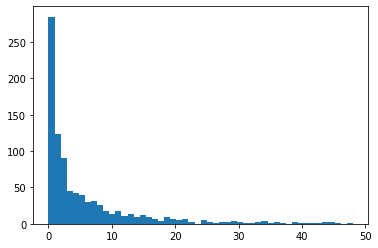

In [16]:
plt.hist(data["skips"], bins = 50)
plt.show()

Observations :
a) The distribution here clearly looks like a Poisson Distribution
b) It looks clumped at 0 (total zeroes : 285 out of 900 overall)
c) Histogram indicates that this dataset has abundance of zeroes

# Answer to Question 6 :
Creating frequency tables(crosstabs) for the response variable 'Skips'

In [ ]:
my_tab = pd.crosstab(index=data["skips"], columns="count") # Name the count column
my_tab

# Answer to Question 7 :

In [ ]:
# We have seen that the response variable "skips" is clearly a count variable.
# The distribution as we clearly see isn't normal which the implementation of linear regression model assumptions require.
# The count data does not follow a normal distribution, because it simply can not and 
# hence, simple linear regression is not the way to go. 
# Hence, we go for Poisson , Negative Binomial models for count variables.

# Answer to Question 8 :

In [18]:
# Check datatypes of all variables in the given dataset
print(data.dtypes)

Opening    object
Solder     object
Mask       object
PadType    object
Panel       int64
skips       int64
dtype: object


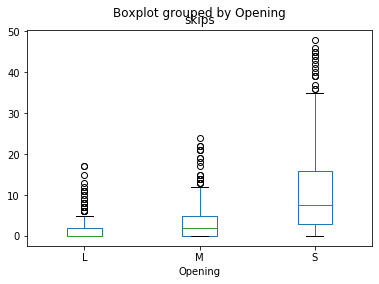

In [21]:
#Boxplot grouped by mask with respect to the response variable skips

data.boxplot(by ='Opening', column =['skips'], grid = False) 

Observations :
It can be seen that the distribution for Opening : L and M are quite similar, except that for the S . 
S has a migher median compared to L & M
Also :  there are few observations as potential outliers amongst all 3 openings

# Answer to Question 9 :

In [26]:
solder_mask = pd.crosstab(index=data["Mask"], 
                           columns=data["Solder"])

solder_mask

Solder,Thick,Thin
Mask,,
A1.5,90,90
A3,150,120
A6,30,60
B3,90,90
B6,90,90


# Answer to Question 10:

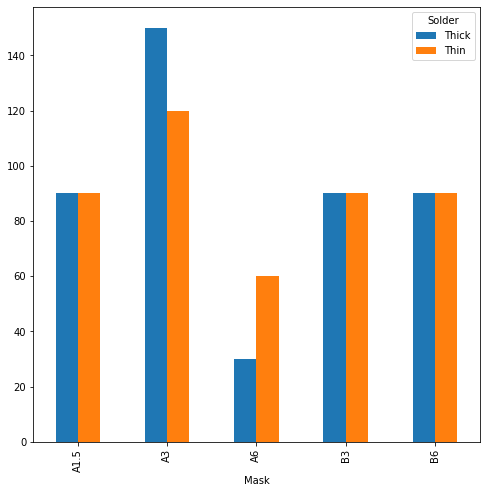

In [27]:
solder_mask.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

Observations:
a) Clearly seen : Thick is the most prominent for A3 mask
b) Thin is the most prominent for A6 mask

# Answer to Question 11 :

Fitting a Poisson Model
GLM with poisson in Python

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

In [31]:
data_pois=glm('skips ~ Opening+Solder+Mask+PadType+Panel', data = data,
family = sm.families.Poisson()).fit()
print(data_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  skips   No. Observations:                  900
Model:                            GLM   Df Residuals:                      882
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1965.8
Date:                Mon, 06 Apr 2020   Deviance:                       1829.0
Time:                        09:27:41   Pearson chi2:                 1.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1004      0.093    -11.

Here : as we observe as per significance : all predictor variables are significant except "PadTypeD7" : higher  p-value

# Answer to Question 12 :

AIC stands for : Akaike Information Criterion or AIC is an alternative criterion for model selection and is based on log of maximum likelihood function under the assumed model when the model dimension is also unknown
AIC does not provide a test for model fit but makes a statement about the relative quality of models and the model with smallest AIC is prefered.

# Answer to Question 13 :
Outliers/Leverage/Influence Points

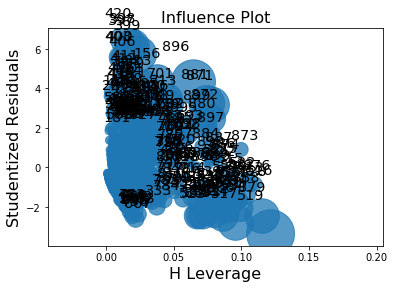

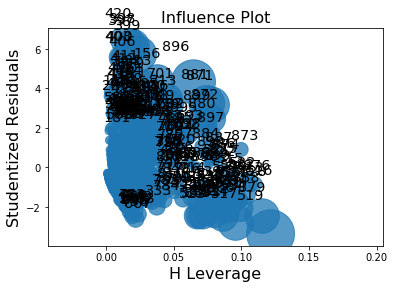

In [32]:
infl = data_pois.get_influence(observed=False)
infl.plot_influence()

In [33]:
# So data points : 896, 879, 519, 398 and 397 are at the extremes. 
# Let's check in the dataset

data.loc[[397,398,519,879,896], :]

,Opening,Solder,Mask,PadType,Panel,skips
397,M,Thick,A6,L4,1,19
398,M,Thick,A6,L4,2,21
519,S,Thin,A6,L4,3,33
879,S,Thin,B6,L4,3,42
896,S,Thin,B6,W9,2,21


Observations :
a) Case 879: had the number of visible solder skips of 42 !
b) Others: Number of visible solder skips >> predicted (because they have larger residuals as seen in graph)

# Answer to Question 14 :
Poisson Model goodness of fit

In [34]:
print(data_pois.summary())
# The output from summary(data.pois) above showed that the Poisson model fits quite badly. 
# The residual deviance is 1829 with 882 degrees of freedom

# The residual deviance is way too higher than the residual degrees of freedom
# If the asssumed model (Poisson) fits the data well, the residual deviance are expected to be 
# approximately equal to the residual degrees of freedom.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  skips   No. Observations:                  900
Model:                            GLM   Df Residuals:                      882
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1965.8
Date:                Mon, 06 Apr 2020   Deviance:                       1829.0
Time:                        09:30:56   Pearson chi2:                 1.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1004      0.093    -11.

# Answer to Question 15 :
Check overdispersion of data

In [35]:
# As, we clearly saw in answer 2:  Mean Count of visible solder skips = 5.53 which is almost 
# 12.9 times variance of the number/count of skips = 71.35 
# Thus the data are highly over dispersed

# Variance > Mean : Overdispersion

# If the variance is equal to the mean, the dispersion statistic would equal one.
# When the dispersion statistic is close to one, a Poisson model fits. 
# If it is larger than one, a negative binomial model fits better.

# The existence of overdispersion leads to the requirement of alternative models that fit the data better.
# Overdispersion is a common phenomenon with count data which is due to either excess of zeros or heterogeneity of population.


#Overdisperson Test
data_pois.pearson_chi2 / data_pois.df_resid
#where .pearson_chi2 represents Pearson statistic and .df_resid represents the degrees of freedom of the residuals.

#The value > 1 shows it is highly overdispersed and Poisson model is not a good fit for overdispersed data. Need to lookout for alternatives

2.022421896590704

# Answer to Question 16 :
Name the alternative model

In [19]:
# Alternative model which you would use to take care of over-dispersion is : 
# "Negative Binomial" model

# The negative-binomial model is a different generalization of the Poisson that allows for over-dispersion

# Answer to Question 17 :
Package to implement the alternative model

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Answer to Question 18 :
Fitting the Alternative model (Negative Binomial)

In [37]:
data_nbin=glm('skips ~ Opening+Solder+Mask+PadType+Panel', data = data,
family = sm.families.NegativeBinomial(alpha=1)).fit()
print(data_nbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  skips   No. Observations:                  900
Model:                            GLM   Df Residuals:                      882
Model Family:        NegativeBinomial   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1923.9
Date:                Mon, 06 Apr 2020   Deviance:                       558.67
Time:                        09:32:30   Pearson chi2:                     490.
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.6993      0.219     -7.

# Answer to Question 19 :
Poisson vs. Alternative model (Negative Binomial)

In [38]:
# Observations: (Negative Binomial Model)
# Comparing Log-Lokelihood for both the models and as we the residual deviance from degrees of freedom
# Much better model as compared to the Poisson
# Here : it's clearly observed : NB model performs better than Poisson due to over dispersion
# and is a good fit (Residual deviance is closer to the residual degrees of freedom)

# Answer to Question 20 :
Zero Inflated and Hurdle Models

In [39]:
# Zero Inflated & Hurdle Models

# Hurdle models assume that there is only one process by which a zero can be produced, 
# while zero-inflated models assume that there are 2 different processes that can produce a zero.

# Hurdle models assume 2 types of subjects: 
# (1) those who never experience the outcome and 
# (2) those who always experience the outcome at least once. 

# Zero-inflated models conceptualize subjects: 
# (1) those who never experience the outcome and 
# (2) those who can experience the outcome but don't always.

# To implement in Python : we need to import from the below library :
from statsmodels.discrete.discrete_model import (DiscreteModel, CountModel,
                                                 Poisson, Logit, CountResults,
                                                 L1CountResults, Probit,
                                                 _discrete_results_docs,
                                                 _validate_l1_method,
                                                 GeneralizedPoisson,
                                                 NegativeBinomialP)
from statsmodels.distributions import zipoisson, zigenpoisson, zinegbin